# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | zhigansk
Processing Record 3 of Set 1 | indaial
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | upernavik
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | terney
Processing Record 9 of Set 1 | makung
City not found. Skipping...
Processing Record 10 of Set 1 | beloha
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | awbari
Processing Record 13 of Set 1 | kahului
Processing Record 14 of Set 1 | denpasar
Processing Record 15 of Set 1 | quatre cocos
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | pindiga
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1 | mutsu
Processing Record 22 of Set 1 | bethel
Processing Record 23 

Processing Record 34 of Set 4 | ostrovnoy
Processing Record 35 of Set 4 | riyadh
Processing Record 36 of Set 4 | mangochi
Processing Record 37 of Set 4 | izhmorskiy
Processing Record 38 of Set 4 | paamiut
Processing Record 39 of Set 4 | kaka
Processing Record 40 of Set 4 | klaksvik
Processing Record 41 of Set 4 | fairbanks
Processing Record 42 of Set 4 | freeport
Processing Record 43 of Set 4 | lagunas
Processing Record 44 of Set 4 | vostok
Processing Record 45 of Set 4 | tiquisio
Processing Record 46 of Set 4 | christchurch
Processing Record 47 of Set 4 | aksu
Processing Record 48 of Set 4 | fare
Processing Record 49 of Set 4 | antalaha
Processing Record 0 of Set 5 | staraya poltavka
Processing Record 1 of Set 5 | saldanha
Processing Record 2 of Set 5 | lumeje
Processing Record 3 of Set 5 | neiafu
Processing Record 4 of Set 5 | port-cartier
Processing Record 5 of Set 5 | ariogala
Processing Record 6 of Set 5 | vilhena
Processing Record 7 of Set 5 | san quintin
Processing Record 8 of S

Processing Record 26 of Set 8 | henties bay
Processing Record 27 of Set 8 | basco
Processing Record 28 of Set 8 | chapleau
Processing Record 29 of Set 8 | lata
Processing Record 30 of Set 8 | dharmavaram
Processing Record 31 of Set 8 | port hawkesbury
Processing Record 32 of Set 8 | gao
Processing Record 33 of Set 8 | bosobolo
Processing Record 34 of Set 8 | ahipara
Processing Record 35 of Set 8 | taoudenni
Processing Record 36 of Set 8 | sabha
Processing Record 37 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 38 of Set 8 | yerbogachen
Processing Record 39 of Set 8 | inta
Processing Record 40 of Set 8 | fereydunshahr
Processing Record 41 of Set 8 | ponta do sol
Processing Record 42 of Set 8 | puerto narino
Processing Record 43 of Set 8 | kokstad
Processing Record 44 of Set 8 | taseyevo
Processing Record 45 of Set 8 | bardiyah
Processing Record 46 of Set 8 | manjacaze
Processing Record 47 of Set 8 | xingyi
Processing Record 48 of Set 8 | pangnirtung
Processing Record

Processing Record 12 of Set 12 | waddan
Processing Record 13 of Set 12 | maragogi
Processing Record 14 of Set 12 | ca mau
Processing Record 15 of Set 12 | atasu
Processing Record 16 of Set 12 | norsup
Processing Record 17 of Set 12 | goure
Processing Record 18 of Set 12 | tura
Processing Record 19 of Set 12 | uspenka
Processing Record 20 of Set 12 | portland
Processing Record 21 of Set 12 | gorno-chuyskiy
City not found. Skipping...
Processing Record 22 of Set 12 | marechal candido rondon
Processing Record 23 of Set 12 | duiwelskloof
Processing Record 24 of Set 12 | mrirt
City not found. Skipping...
Processing Record 25 of Set 12 | conneaut
Processing Record 26 of Set 12 | sjovegan
Processing Record 27 of Set 12 | constantine
Processing Record 28 of Set 12 | namatanai
Processing Record 29 of Set 12 | jiaojiang
Processing Record 30 of Set 12 | nichinan
Processing Record 31 of Set 12 | north chicago
Processing Record 32 of Set 12 | hukuntsi
Processing Record 33 of Set 12 | safranbolu
Pro

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        559 non-null    object 
 1   Lat         559 non-null    float64
 2   Lng         559 non-null    float64
 3   Max Temp    559 non-null    float64
 4   Humidity    559 non-null    int64  
 5   Cloudiness  559 non-null    int64  
 6   Wind Speed  559 non-null    float64
 7   Country     559 non-null    object 
 8   Date        559 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 39.4+ KB


In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,17.67,78,51,7.04,ZA,1681418638
1,zhigansk,66.7697,123.3711,-14.25,95,76,3.70,RU,1681418638
2,indaial,-26.8978,-49.2317,23.07,86,29,1.71,BR,1681418397
3,bluff,-46.6000,168.3333,11.56,79,7,8.05,NZ,1681418531
4,rikitea,-23.1203,-134.9692,22.38,91,100,5.20,PF,1681418545


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,17.67,78,51,7.04,ZA,1681418638
1,zhigansk,66.7697,123.3711,-14.25,95,76,3.70,RU,1681418638
2,indaial,-26.8978,-49.2317,23.07,86,29,1.71,BR,1681418397
3,bluff,-46.6000,168.3333,11.56,79,7,8.05,NZ,1681418531
4,rikitea,-23.1203,-134.9692,22.38,91,100,5.20,PF,1681418545


In [8]:
city_data_df['Max Temp'].min()

-26.65

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

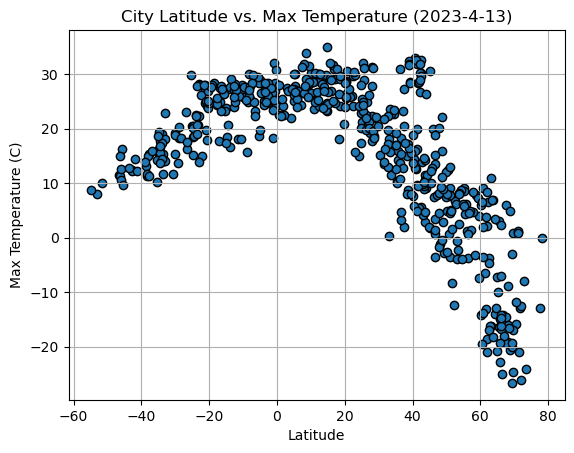

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df['Lat'],
    city_data_df['Max Temp'],
    edgecolors='black'
)

# Incorporate the other graph properties
today_date = str(datetime.now().year)+'-'+str(datetime.now().month)+'-'+str(datetime.now().day)

plt.title(f"City Latitude vs. Max Temperature ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

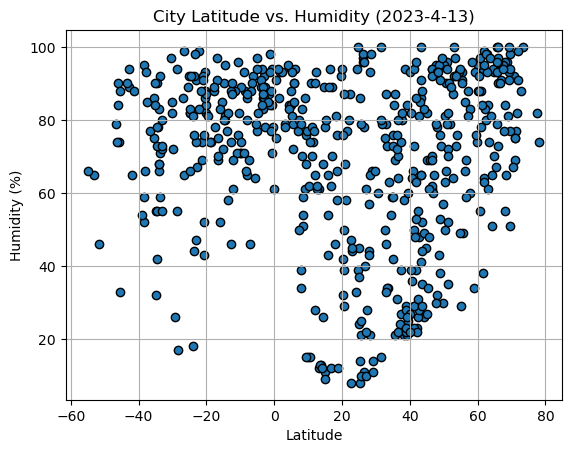

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df['Lat'],
    city_data_df['Humidity'],
    edgecolors='black'
)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

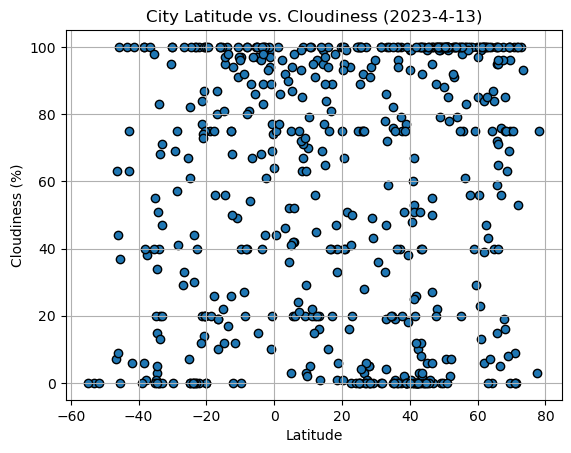

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df['Lat'],
    city_data_df['Cloudiness'],
    edgecolors='black'
)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

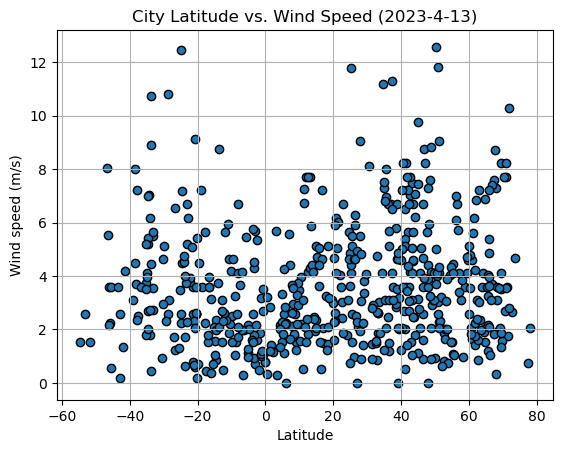

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df['Lat'],
    city_data_df['Wind Speed'],
    edgecolors='black'
)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def create_linear_regression(x_values, y_values, annotation_tuple = None):
    # Get regression data
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Generate regression values and line equation
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create plot
    plt.scatter(x_values,y_values)
    
    # Label axes
    if x_values.name == 'Lat':
        plt.xlabel('Latitude')
    else:
        plt.xlabel(x_values.name)
    plt.ylabel(y_values.name)
    
    # Plot the linear regression
    if annotation_tuple == None:
        annotation_tuple = (0,0)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,annotation_tuple,fontsize=15,color="red")
    print(f"The r-squared is: {rvalue**2}")
    plt.show
    
    

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,zhigansk,66.7697,123.3711,-14.25,95,76,3.70,RU,1681418638
5,upernavik,72.7868,-56.1549,-7.99,88,100,2.66,GL,1681418620
6,jamestown,42.0970,-79.2353,26.80,29,0,5.66,US,1681418529
7,terney,45.0503,136.6092,1.85,69,6,3.15,RU,1681418640
9,yellowknife,62.4560,-114.3525,-3.71,80,100,3.09,CA,1681418399


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,17.67,78,51,7.04,ZA,1681418638
2,indaial,-26.8978,-49.2317,23.07,86,29,1.71,BR,1681418397
3,bluff,-46.6000,168.3333,11.56,79,7,8.05,NZ,1681418531
4,rikitea,-23.1203,-134.9692,22.38,91,100,5.20,PF,1681418545
8,beloha,-25.1667,45.0500,20.50,92,7,3.49,MG,1681418640


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7017180878408364


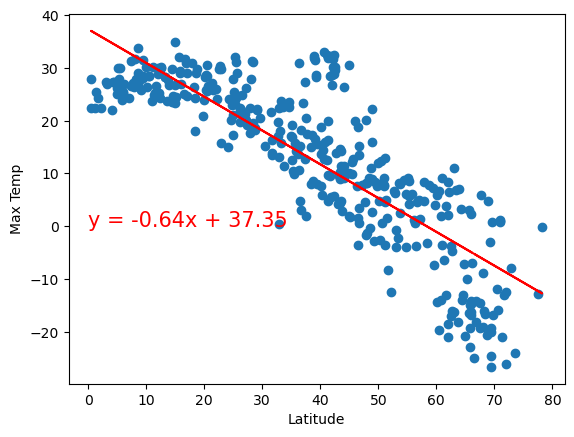

In [17]:
# Linear regression on Northern Hemisphere
create_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])


The r-squared is: 0.6368179704613335


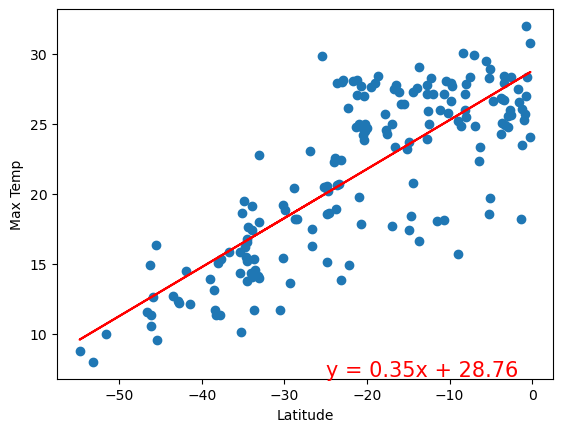

In [18]:
# Linear regression on Southern Hemisphere
create_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], (-25, 7))

**Discussion about the linear relationship:** The linear regressions above show that in the northern hemisphere, as the latitude increases (moves further north) a city's max temperature decreases. In the southern hemisphere, as the latitude decreases (moves further south) a city's max temperature decreases. This intuatively makes sense because we know that temperatures are usually cooler at the Earth's poles.

It's interesting to note that while the relationship between latitude and max temperature are strongly correlated in both hemispheres, the correlation is notably higher in the north compared to the south.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.061801460680407545


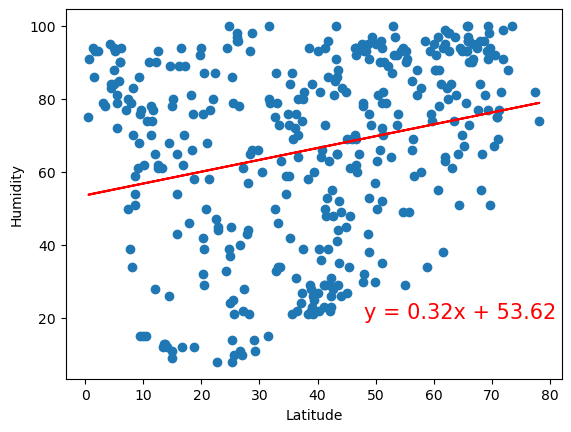

In [19]:
# Northern Hemisphere
create_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], (48,20))

The r-squared is: 0.060421621632549424


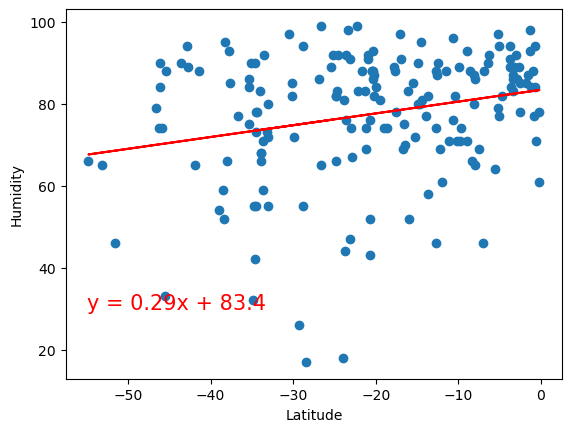

In [20]:
# Southern Hemisphere
create_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], (-55, 30))

**Discussion about the linear relationship:** The plots above very clearly show that latitude and humidity are not very correlated. We can see that in both cases, as cities move closer to the Equator, the humidity tends to rise. However, the spread of the scatter plot data as well as the r-squared values clearly tell us that latitude explains a near negligable amount of variation in humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.011023780305529782


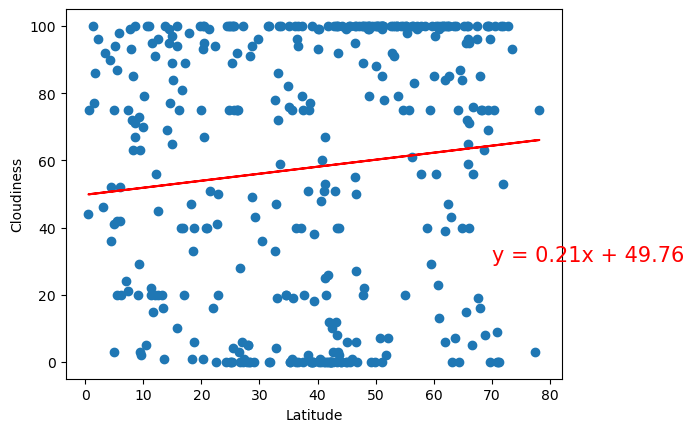

In [21]:
# Northern Hemisphere
create_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], (70,30))

The r-squared is: 0.1397702165244485


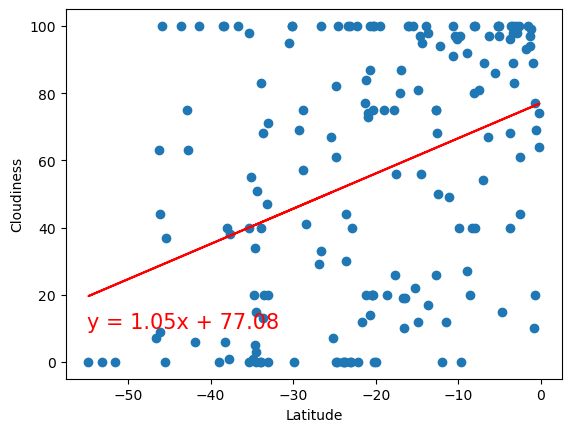

In [22]:
# Southern Hemisphere
create_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], (-55,10))

**Discussion about the linear relationship:** The r-squared values for both these plots show that cloudiness has virtually no correlation with latitude. Both linear regressions have a small positive slope, meaning that as latitude increases, so too does cloudiness. But since the correlations are so low, latitude cannot be used to predict cloudiness in any meaningful way, regardless of hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.01401010939221654


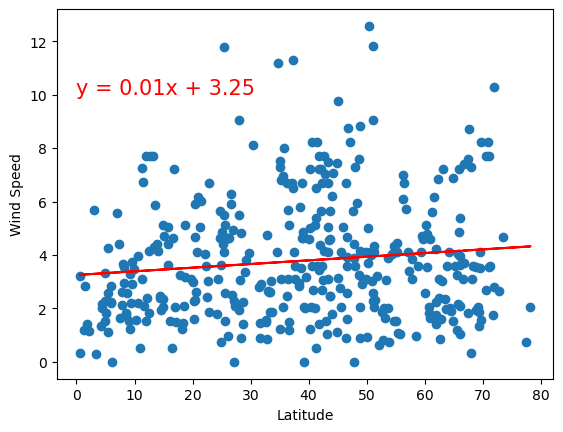

In [24]:
# Northern Hemisphere
create_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], (0,10))

The r-squared is: 0.05751200745901661


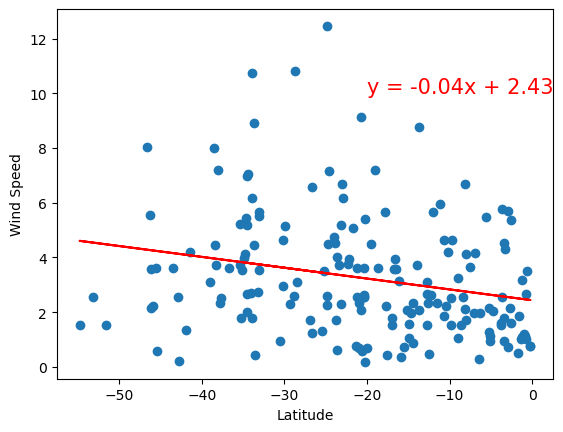

In [25]:
# Southern Hemisphere
create_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], (-20,10))

**Discussion about the linear relationship:** Once again the correlation between latitude and wind speed is very small which tells us that latitude explains virtually none of the variation in wind speed. Both northern and southern hemisphere linear regressions have slopes very close to 0 which indicates that as the latitude changes, the wind speed remains relatively constant. 